#**NAMA : IRMA OCTAVIA CHANIAGO**
#**DOMISILI : KOTA SURABAYA**


**About this file**

Weather measurements recorded by a weather station near Heathrow airport in London, UK.

In [15]:
# Import library yang sekiranya dibutuhkan (biar ga lupa ajah)
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from datetime import datetime

In [2]:
uploaded = files.upload()

Saving weather.zip to weather.zip


In [5]:
import zipfile
import io

# Ganti 'nama_file.zip' dengan nama file zip yang diunggah
with zipfile.ZipFile('weather.zip', 'r') as zip_ref:
    zip_ref.extractall('C:/Users/hp/Downloads')

In [6]:
os.listdir('C:/Users/hp/Downloads')

['london_weather.csv']

In [8]:
df = pd.read_csv('C:/Users/hp/Downloads/london_weather.csv')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [9]:
# Cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [10]:
# Cek data teratas
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [12]:
# Cek apakah terdapat nilai missing value
df.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [13]:
# Mengisi nilai yang hilang dengan rata-rata kolom
df.fillna(df.mean(), inplace=True)

In [14]:
# Cek kembali missing value
df.isnull().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

Text(0.5, 1.0, 'Temperature')

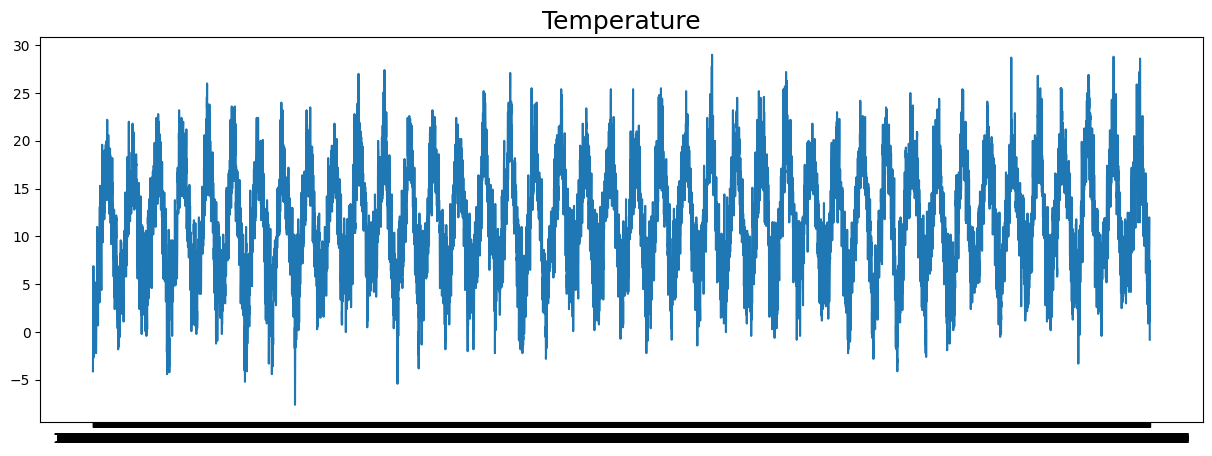

In [39]:
date = df['date'].values
temp  = df['mean_temp'].values

plt.figure(figsize=(15,5))
plt.plot(date, temp)
plt.title('Temperature', fontsize=18)

In [44]:
data = df[['date', 'global_radiation', 'mean_temp']]

# Konversi indeks ke tipe datetime jika belum
data.index = pd.to_datetime(data.index)
data.reset_index()

,index,date,global_radiation,mean_temp
0,1970-01-01 00:00:00.000000000,1979-01-01,52.0,-4.1
1,1970-01-01 00:00:00.000000001,1979-01-02,27.0,-2.6
2,1970-01-01 00:00:00.000000002,1979-01-03,13.0,-2.8
3,1970-01-01 00:00:00.000000003,1979-01-04,13.0,-2.6
4,1970-01-01 00:00:00.000000004,1979-01-05,29.0,-0.8
...,...,...,...,...
15336,1970-01-01 00:00:00.000015336,2020-12-27,32.0,7.5
15337,1970-01-01 00:00:00.000015337,2020-12-28,38.0,1.1
15338,1970-01-01 00:00:00.000015338,2020-12-29,21.0,2.6
15339,1970-01-01 00:00:00.000015339,2020-12-30,22.0,2.7


In [45]:
# Memisahkan tahun, bulan, dan hari
data['Tahun'] = data.index.year
data['Bulan'] = data.index.month
data['Hari'] = data.index.day_name()

<ipython-input-45-8969412b7ff0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tahun'] = data.index.year
<ipython-input-45-8969412b7ff0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bulan'] = data.index.month
<ipython-input-45-8969412b7ff0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [46]:
data.sample(5, random_state=0)

,date,global_radiation,mean_temp,Tahun,Bulan,Hari
1970-01-01 00:00:00.000009344,2004-08-01,261.0,21.6,1970,1,Thursday
1970-01-01 00:00:00.000001001,1981-09-28,145.0,12.5,1970,1,Thursday
1970-01-01 00:00:00.000007475,1999-06-20,269.0,16.7,1970,1,Thursday
1970-01-01 00:00:00.000004145,1990-05-08,264.0,13.1,1970,1,Thursday
1970-01-01 00:00:00.000007401,1999-04-07,90.0,9.6,1970,1,Thursday


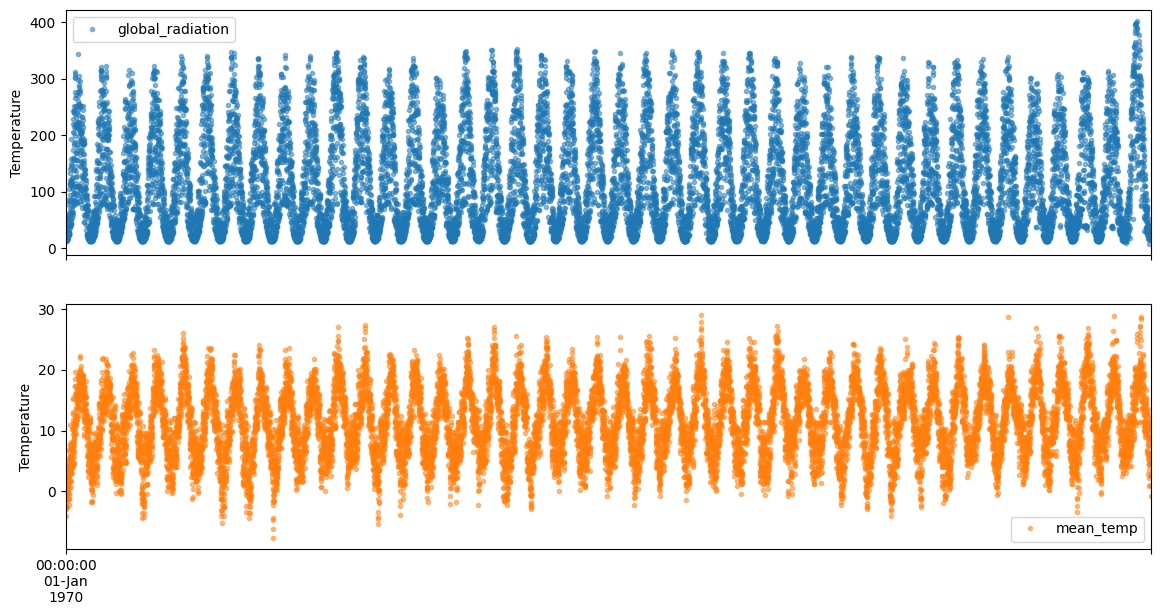

In [49]:
cols_to_plot = ['global_radiation', 'mean_temp']
axes = data[cols_to_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14,7), subplots=True)
for ax in axes:
    ax.set_ylabel('Temperature')

#**Normalisasi**

In [26]:
# Normalisasi data
scaler = preprocessing.MinMaxScaler()
X_scaler = scaler.fit_transform(df['mean_temp'].values.reshape(-1,1))
X_fix = X_scaler.reshape(-1)

#**Membuat Model**

Setelah kita memiliki atribut dan label yang terpisah, kita juga akan memisahkan kembali data kita menjadi data latih dan data uji untuk mengevaluasi kinerja model kita. Fungsi train_test_split dapat membantu kita untuk melakukan hal ini dengan mudah. Pada latihan ini kita akan menggunakan 20% dari seluruh data sebagai data uji.

In [27]:
# Mmebagi data latih dan test
dt_train, dt_test, tmp_train, tmp_test = train_test_split(df['date'].values, X_fix, test_size=0.2, shuffle=False)

In [28]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [29]:
train_set = windowed_dataset(tmp_train, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set = windowed_dataset(tmp_test, window_size=60, batch_size=100, shuffle_buffer=1000)

Selanjutnya untuk arsitektur model gunakan 2 buah layer LSTM. Ketika menggunakan 2 buah layer LSTM, perhatikan bahwa layer pertama harus memiliki parameter return_sequences yang bernilai True.

In [30]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60)),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

Lalu pada optimizer, kita akan menggunakan parameter learning rate dan momentum seperti di bawah. Loss function yang dapat dicoba untuk ini adalah Huber yang merupakan salah satu loss function yang umum digunakan pada kasus time series. Serta metrik yang digunakan untuk mengevaluasi model adalah MAE.

In [31]:
# Kompilasi model dengan optimizer yang memiliki learning rate
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=['mae'])

In [32]:
max_mae = (X_fix.max() - X_fix.min()) * 10/100
print(f'KETENTUAN!!')
print(f'Batas nilai mae: harus dibawah {max_mae}')

KETENTUAN!!
Batas nilai mae: harus dibawah 0.1


In [35]:
# Gunakan fungsi callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < 0.1 ):
      print("\n Alhamdulillah Ya Allah.. MAE pada model saya telah < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [36]:
history = model.fit(train_set,
                    validation_data = val_set, # menampilkan akurasi pengujian data validasi
                    epochs=500, batch_size=60,
                    callbacks =[callbacks])

Epoch 1/500
123/123 [==============================] - 29s 185ms/step - loss: 0.0207 - mae: 0.1563 - val_loss: 0.0098 - val_mae: 0.1162
Epoch 2/500
123/123 [==============================] - 27s 219ms/step - loss: 0.0086 - mae: 0.1073 - val_loss: 0.0064 - val_mae: 0.0917
Epoch 3/500
123/123 [==============================] - ETA: 0s - loss: 0.0056 - mae: 0.0841
 Alhamdulillah Ya Allah.. MAE pada model saya telah < 10% skala data
123/123 [==============================] - 22s 178ms/step - loss: 0.0056 - mae: 0.0841 - val_loss: 0.0038 - val_mae: 0.0691


#**Membuat Plot Loss Training & Validation**

In [37]:
mae = history.history['mae']
val_mae = history.history['val_mae']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(mae))

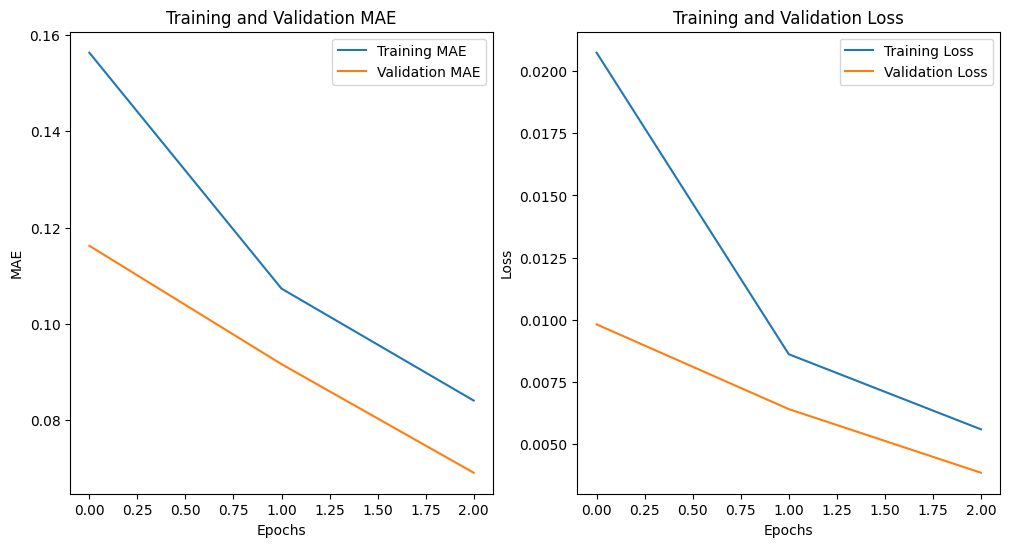

In [38]:
# Membuat grafik untuk MAE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, mae, label='Training MAE')
plt.plot(epochs_range, val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()

# Membuat grafik untuk Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()